In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.metrics import mean_absolute_error

def RNN(data, ratio, title):
    # Loại bỏ các dòng trùng lặp
    data.drop_duplicates(inplace=True)

    dates = pd.to_datetime(data_wal['Date']).values.astype(np.datetime64)
    prices = data_wal['Close'].values.astype('float32')

    # Chia data thành train, test
    train_size = int(ratio * len(prices))

    train_data = prices[:train_size].reshape(-1, 1)
    test_data = prices[train_size:].reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)

    # Define sequence length and number of features
    seq_length = 30
    num_features = 1

    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)

    # Define model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, input_shape=(seq_length, num_features)),
        tf.keras.layers.Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=64)

    #Predict tập test và kiểm tra
    y_pred = model.predict(X_test)

    # Inverse transform data to get actual prices
    y_test = scaler.inverse_transform(y_test)
    y_pred = scaler.inverse_transform(y_pred)

    # Tính rmse trên test
    mse = np.mean(np.square(y_test - y_pred))
    rmse = np.sqrt(mse)
    # In ra giá trị RMSE
    print("RMSE:", rmse)

    # Tính MAPE trên test
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("MAPE on test set:", mape)

    mae = mean_absolute_error(y_test, y_pred)
    mae_mean = np.mean(mae)
    print('MAE:', mae_mean)

    # Plot actual and predicted values
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

Epoch 1/50
137/137 [==============================] - 5s 15ms/step - loss: 0.0025
Epoch 2/50
137/137 [==============================] - 2s 16ms/step - loss: 1.9982e-04
Epoch 3/50
137/137 [==============================] - 2s 16ms/step - loss: 1.9436e-04
Epoch 4/50
137/137 [==============================] - 2s 18ms/step - loss: 1.7498e-04
Epoch 5/50
137/137 [==============================] - 2s 18ms/step - loss: 1.6397e-04
Epoch 6/50
137/137 [==============================] - 2s 17ms/step - loss: 1.6072e-04
Epoch 7/50
137/137 [==============================] - 2s 18ms/step - loss: 1.5984e-04
Epoch 8/50
137/137 [==============================] - 2s 17ms/step - loss: 1.3984e-04
Epoch 9/50
137/137 [==============================] - 2s 16ms/step - loss: 1.2509e-04
Epoch 10/50
137/137 [==============================] - 2s 14ms/step - loss: 1.1894e-04
Epoch 11/50
137/137 [==============================] - 2s 12ms/step - loss: 1.1661e-04
Epoch 12/50
137/137 [==============================] - 2

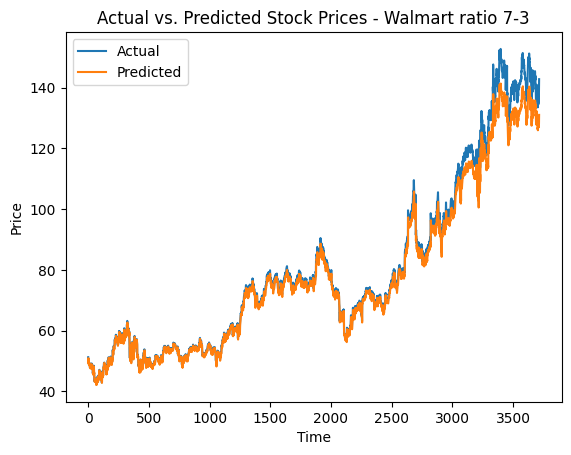

In [ ]:
# Load data
data_wal = pd.read_csv('https://raw.githubusercontent.com/minknhom/dataset/main/walmart_stock_price.csv')
data_fb = pd.read_csv('https://raw.githubusercontent.com/minknhom/dataset/main/FB.csv')

wal_73 = RNN(data_wal, 0.7, 'Actual vs. Predicted Stock Prices - Walmart ratio 7-3')

Epoch 1/50
156/156 [==============================] - 2s 8ms/step - loss: 0.0144
Epoch 2/50
156/156 [==============================] - 1s 8ms/step - loss: 2.2390e-04
Epoch 3/50
156/156 [==============================] - 2s 12ms/step - loss: 2.0151e-04
Epoch 4/50
156/156 [==============================] - 2s 11ms/step - loss: 1.7898e-04
Epoch 5/50
156/156 [==============================] - 1s 8ms/step - loss: 1.8961e-04
Epoch 6/50
156/156 [==============================] - 1s 8ms/step - loss: 1.6160e-04
Epoch 7/50
156/156 [==============================] - 1s 8ms/step - loss: 1.6585e-04
Epoch 8/50
156/156 [==============================] - 1s 8ms/step - loss: 1.4153e-04
Epoch 9/50
156/156 [==============================] - 1s 8ms/step - loss: 1.4302e-04
Epoch 10/50
156/156 [==============================] - 1s 8ms/step - loss: 1.4504e-04
Epoch 11/50
156/156 [==============================] - 1s 8ms/step - loss: 1.3370e-04
Epoch 12/50
156/156 [==============================] - 1s 9ms/ste

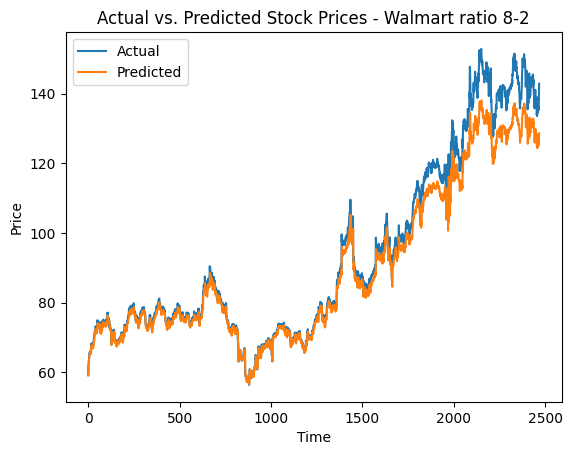

In [ ]:
wal_82 = RNN(data_wal, 0.8, 'Actual vs. Predicted Stock Prices - Walmart ratio 8-2')

Epoch 1/50
137/137 [==============================] - 2s 8ms/step - loss: 0.0027
Epoch 2/50
137/137 [==============================] - 1s 8ms/step - loss: 1.2418e-04
Epoch 3/50
137/137 [==============================] - 1s 8ms/step - loss: 1.1931e-04
Epoch 4/50
137/137 [==============================] - 1s 8ms/step - loss: 1.0395e-04
Epoch 5/50
137/137 [==============================] - 1s 8ms/step - loss: 1.0991e-04
Epoch 6/50
137/137 [==============================] - 1s 8ms/step - loss: 9.1906e-05
Epoch 7/50
137/137 [==============================] - 1s 8ms/step - loss: 1.0775e-04
Epoch 8/50
137/137 [==============================] - 2s 11ms/step - loss: 9.5757e-05
Epoch 9/50
137/137 [==============================] - 2s 13ms/step - loss: 9.8032e-05
Epoch 10/50
137/137 [==============================] - 1s 8ms/step - loss: 1.1412e-04
Epoch 11/50
137/137 [==============================] - 1s 8ms/step - loss: 9.8816e-05
Epoch 12/50
137/137 [==============================] - 1s 8ms/ste

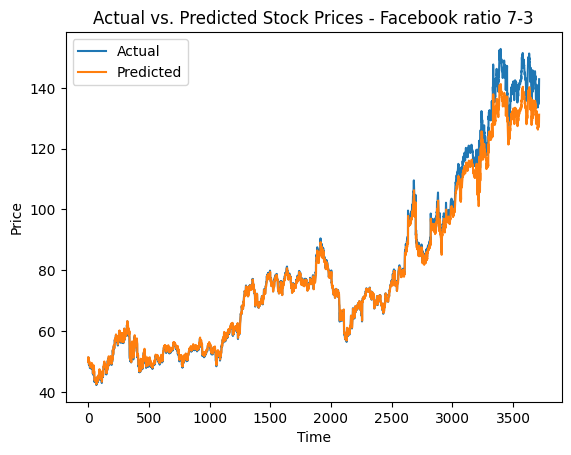

In [ ]:
fb_73 = RNN(data_fb, 0.7, 'Actual vs. Predicted Stock Prices - Facebook ratio 7-3')

Epoch 1/50
156/156 [==============================] - 3s 12ms/step - loss: 7.1283e-04
Epoch 2/50
156/156 [==============================] - 1s 8ms/step - loss: 9.0124e-05
Epoch 3/50
156/156 [==============================] - 1s 8ms/step - loss: 9.4834e-05
Epoch 4/50
156/156 [==============================] - 1s 8ms/step - loss: 1.0330e-04
Epoch 5/50
156/156 [==============================] - 1s 8ms/step - loss: 9.8411e-05
Epoch 6/50
156/156 [==============================] - 1s 8ms/step - loss: 1.1283e-04
Epoch 7/50
156/156 [==============================] - 1s 8ms/step - loss: 8.2077e-05
Epoch 8/50
156/156 [==============================] - 1s 8ms/step - loss: 7.9878e-05
Epoch 9/50
156/156 [==============================] - 1s 9ms/step - loss: 8.6307e-05
Epoch 10/50
156/156 [==============================] - 2s 13ms/step - loss: 7.9832e-05
Epoch 11/50
156/156 [==============================] - 2s 10ms/step - loss: 7.4837e-05
Epoch 12/50
156/156 [==============================] - 1s 8m

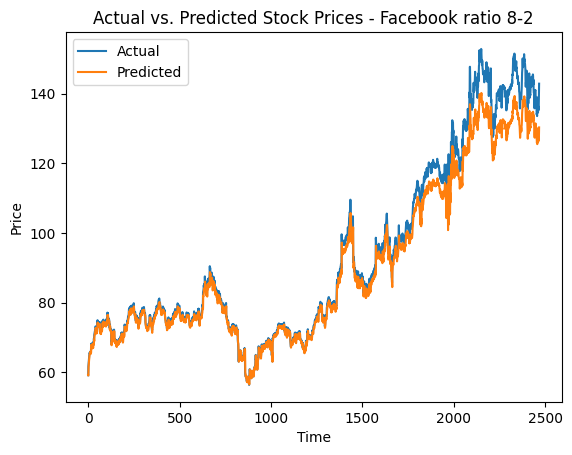

In [ ]:
fb_73 = RNN(data_fb, 0.8, 'Actual vs. Predicted Stock Prices - Facebook ratio 8-2')

In [ ]:
# Code biến đổi mô hình thành ManyToMany tham khảo ChatGPT
# def create_sequences(data, seq_length, num_outputs):
#     X = []
#     y = []
#     for i in range(len(data)-seq_length-num_outputs+1):
#         X.append(data[i:i+seq_length])
#         y.append(data[i+seq_length:i+seq_length+num_outputs])
#     return np.array(X), np.array(y)

# model = tf.keras.Sequential([
#     tf.keras.layers.SimpleRNN(64, input_shape=(seq_length, num_features), return_sequences=True),
#     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
# ])